# Passive degrees of freedom



Passive dofs!

In [1]:
from blop.utils import prepare_re_env

%run -i $prepare_re_env.__file__ --db-type=temp

/usr/share/miniconda3/envs/blop-py3.10/lib/python3.10/site-packages/blop/dofs.py:165: UserWarning: No type was specified for DOF brownian1. Assuming type=continuous.
  warnings.warn(f"No type was specified for DOF {self.name}. Assuming type={self.type}.")
/usr/share/miniconda3/envs/blop-py3.10/lib/python3.10/site-packages/blop/dofs.py:165: UserWarning: No type was specified for DOF brownian2. Assuming type=continuous.
  warnings.warn(f"No type was specified for DOF {self.name}. Assuming type={self.type}.")


running iteration 1 / 1


Transient Scan ID: 1     Time: 2024-05-13 18:02:13
Persistent Unique Scan ID: '5319488a-6871-452a-926e-ceee4695a86c'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |  brownian2 |  brownian1 |         x3 |
+-----------+------------+------------+------------+------------+------------+------------+
|         1 | 18:02:13.1 |      0.369 |     -1.916 |     -0.062 |     -0.014 |      0.000 |


|         2 | 18:02:13.7 |      1.673 |     -3.878 |     -0.349 |      0.094 |      0.000 |


|         3 | 18:02:14.1 |     -0.804 |     -4.468 |     -0.269 |     -0.122 |      0.000 |


|         4 | 18:02:14.6 |     -3.099 |     -2.516 |     -0.090 |      0.299 |      0.000 |


|         5 | 18:02:15.0 |     -2.156 |     -1.256 |     -0.177 |      0.290 |      0.000 |


|         6 | 18:02:15.4 |     -4.255 |     -0.708 |      0.013 |      0.117 |      0.000 |


|         7 | 18:02:15.8 |     -4.445 |      0.841 |      0.109 |      0.136 |      0.000 |


|         8 | 18:02:16.3 |     -3.220 |      2.805 |      0.252 |      0.149 |      0.000 |


|         9 | 18:02:16.7 |     -1.642 |      1.545 |      0.179 |      0.249 |      0.000 |


|        10 | 18:02:17.1 |      0.793 |      2.135 |      0.317 |     -0.003 |      0.000 |


|        11 | 18:02:17.6 |     -0.378 |      4.601 |      0.532 |     -0.292 |      0.000 |


|        12 | 18:02:18.0 |      2.184 |      3.940 |      0.608 |     -0.060 |      0.000 |


|        13 | 18:02:18.5 |      4.225 |      3.395 |      0.258 |     -0.103 |      0.000 |


|        14 | 18:02:18.9 |      3.108 |      0.181 |      0.457 |     -0.201 |      0.000 |


|        15 | 18:02:19.3 |      3.231 |     -0.118 |      0.540 |     -0.112 |      0.000 |


|        16 | 18:02:19.7 |      4.417 |     -3.176 |      0.528 |     -0.031 |      0.000 |


+-----------+------------+------------+------------+------------+------------+------------+
generator list_scan ['5319488a'] (scan num: 1)


/usr/share/miniconda3/envs/blop-py3.10/lib/python3.10/site-packages/bluesky/callbacks/fitting.py:167: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer


trained model 'himmelblau' in 175 ms


('5319488a-6871-452a-926e-ceee4695a86c',)

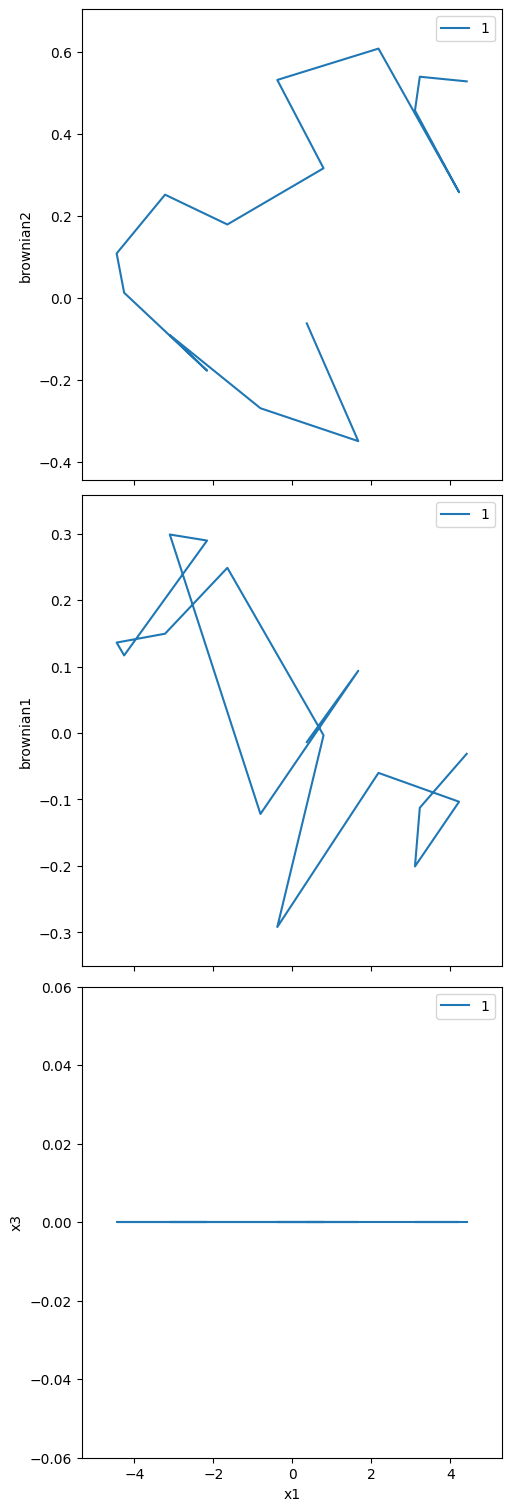

In [2]:
from blop.digestion.tests import constrained_himmelblau_digestion
from blop import DOF, Agent, Objective
from blop.dofs import BrownianMotion


dofs = [
    DOF(name="x1", search_domain=(-5.0, 5.0)),
    DOF(name="x2", search_domain=(-5.0, 5.0)),
    DOF(name="x3", search_domain=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(name="himmelblau", target="min"),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

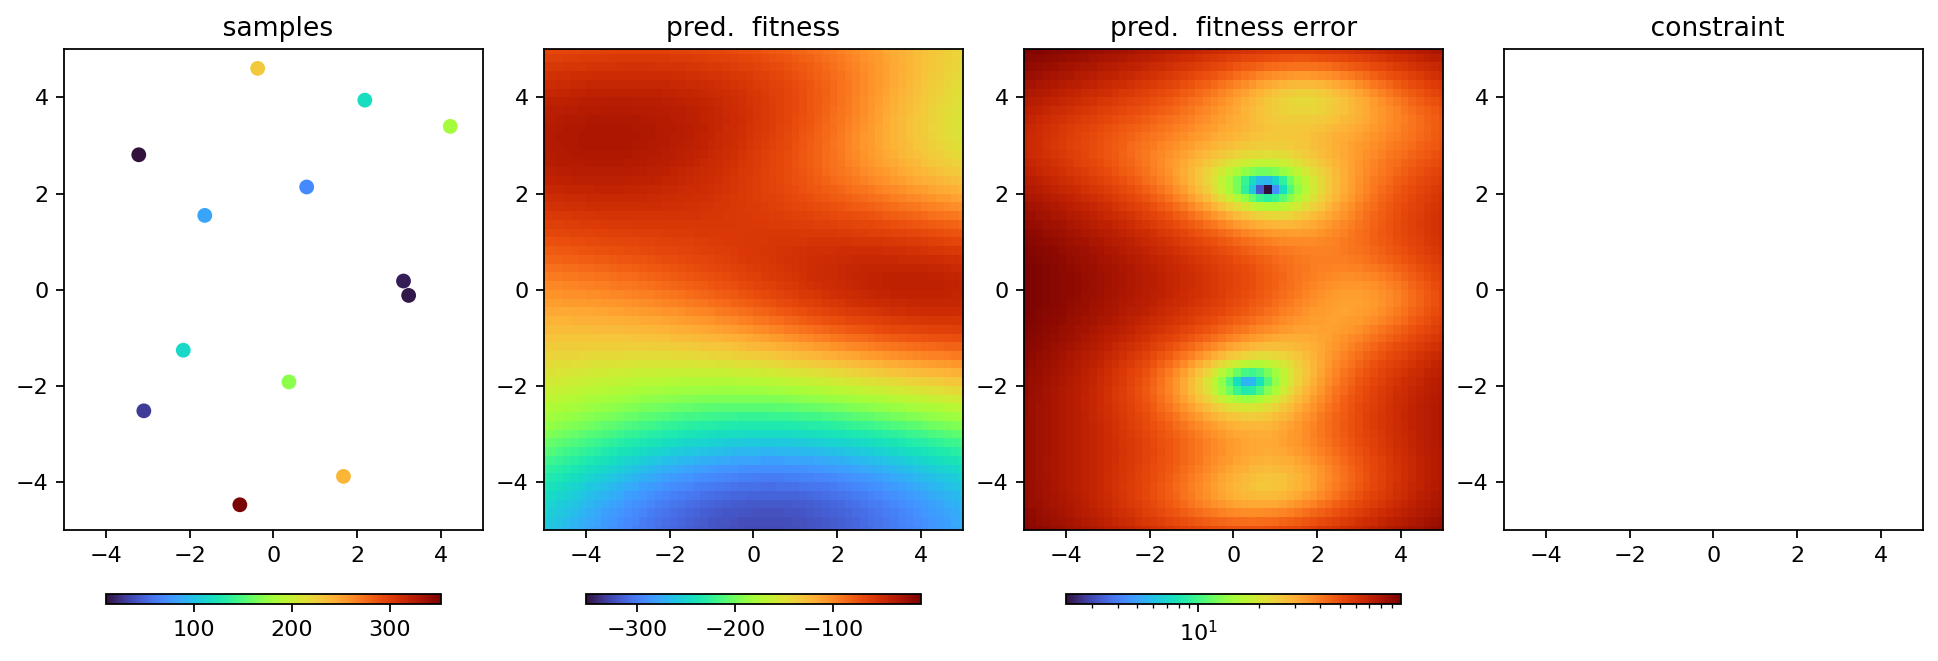

In [3]:
agent.plot_objectives()